In [1]:
#Загружаем наш дата сет. Мы имеем дата сет из 10 колонок (Age, Sex, ALP, ALT, AST, BIL, CHE, CHOL, CREA, Category).Среди данных есть как и числовые так и качественные переменныею. Крайний столбец Category выступает как классификатор.

In [1]:
# С помощью этой чанки мы загрузим  необходимые библиотеки для начала работы (Numpy, Matplotlib.pyplot ,Pandas)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Загрузим над исходный датасет. 
df = pd.read_csv('mayorov.csv', sep=',' )

In [3]:
# Здесь можно проверить что было загруженно в переменную df.
df

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHOL,CREA,Category
0,32,m,38.5,52.5,7.7,22.1,7.5,3.23,106.0,0
1,32,m,38.5,70.3,18.0,24.7,3.9,4.80,74.0,0
2,32,m,46.9,74.7,36.2,52.6,6.1,5.20,86.0,0
3,32,m,43.2,52.0,30.6,22.6,18.9,4.74,80.0,0
4,32,m,39.2,74.1,32.6,24.8,9.6,4.32,76.0,0
...,...,...,...,...,...,...,...,...,...,...
610,62,f,32.0,416.6,5.9,110.3,50.0,6.30,55.7,1
611,64,f,24.0,102.8,2.9,44.4,20.0,3.02,63.0,1
612,64,f,29.0,87.3,3.5,99.0,48.0,3.63,66.7,1
613,46,f,33.0,NaN,39.0,62.0,20.0,4.20,52.0,1


In [4]:
# Для последующей корректной работы проверим наш датасет на пропуски.
def fill_missing_num(x):
    num_var = list(x._get_numeric_data().columns)
    for col_names in num_var:        
        prep_med = SimpleImputer(missing_values=np.nan, strategy='mean')
        prep_med.fit(x[num_var])
        x[num_var] = prep_med.transform(x[num_var])
    return(x)

In [5]:
# Заполним присутствующие пропуски с помощью SimpleImputer.
from sklearn.impute import SimpleImputer
df = fill_missing_num(df)

In [6]:
# С пмощью этой чанки мы произведем кодиррование наших качественных перменных, в нашем случае только столбец Sex.
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [8]:
df = encoding_char(df)

In [9]:
# Наш датасет следует разделить на тестовый и учебный в определенной пропорции. Пусть это будет  20/80.
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [10]:
# Производим шкалирование наших данных без нашей эдогенной переменной Category.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

In [11]:
# Строим базовую модель и анализируем  полученный отчет. Можно сделать вывод, что значимых перменных три но при этом будем использовать найлучшие перменные, это х4 (ALT) и х5 (AST). Будем использовать их для построения наших классификаторов.
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.305797
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.232     
Dependent Variable: y                AIC:              318.9038  
Date:               2020-11-23 19:51 BIC:              356.6901  
No. Observations:   492              Log-Likelihood:   -150.45   
Df Model:           8                LL-Null:          -195.80   
Df Residuals:       483              LLR p-value:      3.3608e-16
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.0645      0.1583    -0.4075    0.6837    -0.3748     0.2458
x2     0.1800      0.1643     1.0957    0.2732    -0.1

In [12]:
# Остлавляем только значимые переменные.
X_train = X_train[:,[4,5]]
X_test = X_test[:,[4,5]]

In [13]:
# Обучаем модель логистической регрессии.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 13).fit(X_train, y_train)

In [14]:
# Делаем прогноз на тестовой выборке. Уровень качества модели превышает 95%, это значит что  95% объектов распознано верно.
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

0.959349593495935

In [15]:
# Строим таблицу сопряженности. Можно сделать вывод, что 5 положительных случая ложно определены как отрицательные. 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[108   0]
 [  5  10]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


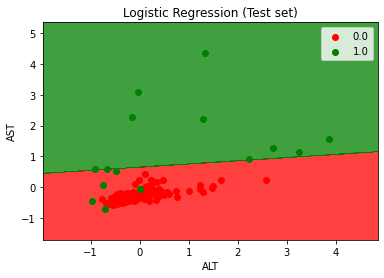

In [16]:
# Строим область значений. В этом случае отделение линейно. Зелёные точки - больные люди, красные точки - здоровые. Люди с повышенным значением AST более склонны к болезни. 
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('ALT')
plt.ylabel('AST')
plt.legend()
plt.show()

In [17]:
# Устанавливаем необходимые пакеты Keras.
import keras
from keras.models import Sequential
from keras.layers import Dense

In [19]:
# Строим нейронную сеть прямой передачи сигнала. На входном слое 8 нейрона. relu - функция  позволит учесть наличие линейнносоти в исходных данных. На втором слое выбирем 1 нейрон используя сигмоидальную функцию. 
cnn = Sequential()
cnn.add(Dense(units = 8,  activation = 'relu', input_dim = 2))
cnn.add(Dense(units = 1,  activation = 'sigmoid'))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [20]:
# Обучаем нейронную сеть в течении 100 эпох.
cnn.fit(X_train, y_train, epochs = 100, batch_size = 8)

Epoch 1/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6719 - accuracy: 0.7398
Epoch 2/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5587 - accuracy: 0.8496
Epoch 3/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4700 - accuracy: 0.8679
Epoch 4/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4043 - accuracy: 0.8679
Epoch 5/100
62/62 [==============================] - 0s 2ms/step - loss: 0.3564 - accuracy: 0.8720
Epoch 6/100
62/62 [==============================] - 0s 2ms/step - loss: 0.3206 - accuracy: 0.8780
Epoch 7/100
62/62 [==============================] - 0s 2ms/step - loss: 0.2950 - accuracy: 0.8780
Epoch 8/100
62/62 [==============================] - 0s 2ms/step - loss: 0.2756 - accuracy: 0.8780
Epoch 9/100
62/62 [==============================] - 0s 2ms/step - loss: 0.2606 - accuracy: 0.8760
Epoch 10/100
62/62 [==============================] - 0s 2ms/step - loss: 0.2487 - accuracy: 0.8760
Epoch 11/

62/62 [==============================] - 0s 1ms/step - loss: 0.1262 - accuracy: 0.9614
Epoch 83/100
62/62 [==============================] - 0s 2ms/step - loss: 0.1267 - accuracy: 0.9614
Epoch 84/100
62/62 [==============================] - 0s 1ms/step - loss: 0.1260 - accuracy: 0.9614
Epoch 85/100
62/62 [==============================] - 0s 2ms/step - loss: 0.1257 - accuracy: 0.9614
Epoch 86/100
62/62 [==============================] - 0s 2ms/step - loss: 0.1256 - accuracy: 0.9614
Epoch 87/100
62/62 [==============================] - 0s 2ms/step - loss: 0.1254 - accuracy: 0.9614
Epoch 88/100
62/62 [==============================] - 0s 2ms/step - loss: 0.1251 - accuracy: 0.9614
Epoch 89/100
62/62 [==============================] - 0s 3ms/step - loss: 0.1250 - accuracy: 0.9614
Epoch 90/100
62/62 [==============================] - 0s 2ms/step - loss: 0.1252 - accuracy: 0.9614
Epoch 91/100
62/62 [==============================] - 0s 1ms/step - loss: 0.1251 - accuracy: 0.9614
Epoch 92/100


In [21]:
# Строим прогноз на тестовой выборке.
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.5)

In [22]:
# Строим таблицу сопряженности. Исходя из этого  3 положительных случая ложно определены как отрицательные.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[108   0]
 [  3  12]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


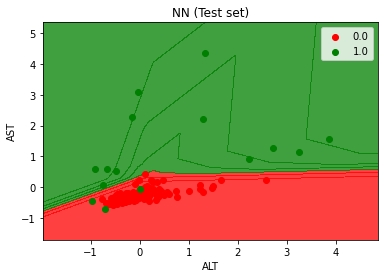

In [23]:
# Строим область значений. Они отделяются  не линейно. Однако после усложения модели после увеличения входных нейронов с 2 до 8, качество модели улучшилось. 
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, cnn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('NN (Test set)')
plt.xlabel('ALT')
plt.ylabel('AST')
plt.legend()
plt.show()

In [ ]:
# Выводы. Исходя из анализа можно сделать вывод, что исходная логистическая модель обладает повышенным качеством и определяет 95% объектов верно. Еще я бы отметил, что позитивные и негативные значения отделяются линейно. Эту линейность мы используем для построения нейронной сети. При использовании стандартных параметров мы получаем качество модели худше, но при этом сохраняется линейность отделения позитивных от негативных. Для улучшения качества модели было принято решение увеличить количество нейронов на первом слое с 2 до 8, что позволило немного улучшить качество модели в целом, однако разделение положительных от отрицательных более не линейно.